In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context="poster")

# from IPython.display import display, Math
from ipywidgets import interactive, interact_manual, \
                       RadioButtons, FloatSlider, fixed

import numpy as np

# from astropy.modeling import models, fitting

## Boilerplate path hack to give access to full clustered_SNe package
import sys, os
if __package__ is None:
    if os.pardir not in sys.path[0]:
        file_dir = os.getcwd()
        sys.path.insert(0, os.path.join(file_dir, 
                                        os.pardir, 
                                        os.pardir))

from clustered_SNe.analysis.visualize_helpers import parameter_study_wrapper
from clustered_SNe.analysis.thornton_helpers import ThorntonParameterStudy, \
                                                    energies



/Users/egentry/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
data_dir = "../saved_runs/thornton"
thornton_parameter_study = ThorntonParameterStudy(data_dir)

In [3]:
run_summary = RunSummary()
result_widget_parameter_study = interact_manual(parameter_study_wrapper,
                                data_dir = fixed(data_dir),
                                log_Z = FloatSlider(min=-3.0, max=+0.5, step=0.5, value=0),
                                log_n = FloatSlider(min=-3.0, max=+3.0, step=1.0, value=-1),
                                T     = fixed(1e4),
                                with_cooling = True)
def update_run_summary_parameter_study(widget):
    """Copy the latest result into run_summarya
    
    Don't reuse this function definition; needs to be bound to the correct result_widget"""
    run_summary.replace_with(result_widget_parameter_study.widget.result)
result_widget_parameter_study.widget.children[-1].on_click(update_run_summary_parameter_study)

In [4]:
thornton_parameter_study.df.head()

,background_density,background_temperature,metallicity,number_density,E_R_kin,E_R_int,E_R_tot,t_f,R_shock
0,2.224587e-21,10000,0.000020,1329.999845,6.505033e+49,2.374112e+49,8.879145e+49,6.855601e+11,1.023776e+19
1,2.224587e-21,10000,0.000632,1329.999845,6.929573e+49,1.998836e+49,8.928409e+49,5.750614e+11,9.414944e+18
2,2.224587e-22,10000,0.000020,132.999984,6.467735e+49,3.157304e+49,9.625039e+49,3.525105e+12,2.922131e+19
3,2.224587e-24,10000,0.000632,1.330000,6.024864e+49,8.219634e+49,1.424450e+50,3.427176e+13,1.988724e+20
4,2.224587e-23,10000,0.006325,13.299998,6.899039e+49,2.202135e+49,9.101174e+49,6.212072e+12,5.803480e+19


<IPython.core.display.Math object>

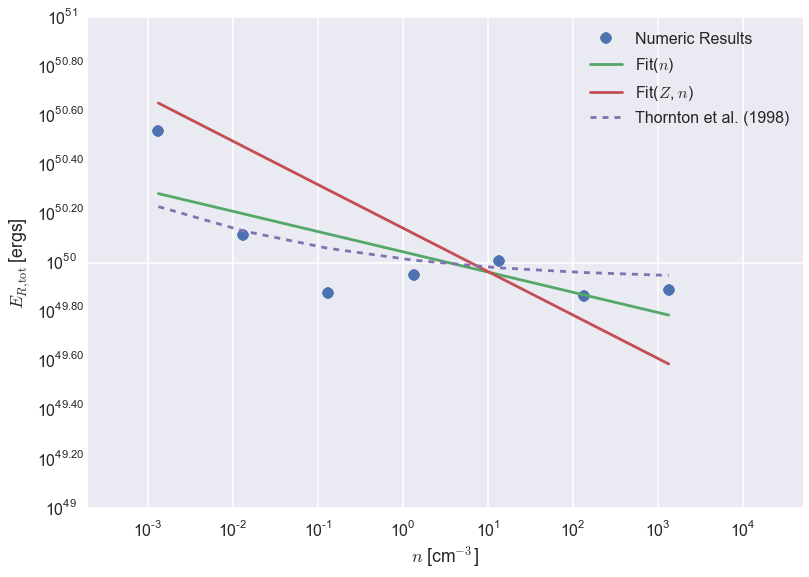

In [5]:
       
interactive(thornton_parameter_study.plot_one_number_density,
            energy = RadioButtons(options=energies))


<IPython.core.display.Math object>

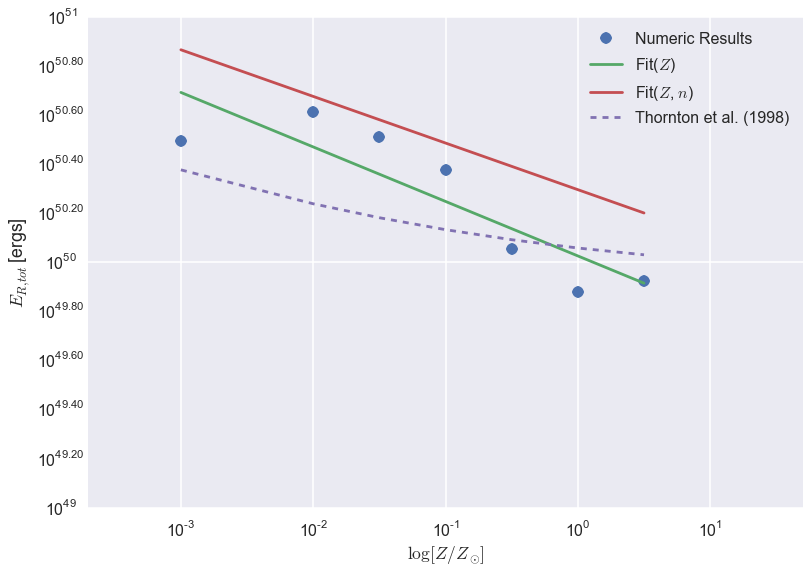

In [6]:
    
interactive(thornton_parameter_study.plot_one_metallicity,
            energy = RadioButtons(options=energies))
